##### 샘플 데이터

In [2]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('클러스터링 결과.pkl', 'rb') as file:
    df=pickle.load(file)
df.head()

,Date,Name,Score,Review,like,tagged_review,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.06991557, 0.050187, 0.0070132413, -0.05313...",3
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-0.042455174, 0.01708158, -0.018082727, -0.03...",2
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.031734474, 0.025200555, 0.02921814, -0.023...",5
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.017127914, 0.015796002, 0.00030726078, -0....",4
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[-0.053623084, 0.019849058, -0.019949786, -0.0...",2


# ◆ 1. LDA를 위한 데이터 전처리
* 1.1. 전체 단어의 사전 만들고 각 문서에 매칭하기
    > 단어들이 문서에 얼마나 위치해 있는지 분포를 파악해야하기 때문에 분석할 전체 데이터 대상으로
    사용된 단어의 사전을 생성해야한다,


In [4]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

### 1.1 전체 단어의 사전 만들고 각 문서에 매칭하기

In [5]:
df_cluster0=df[df['cluster']==0]
df_cluster0

,Date,Name,Score,Review,like,tagged_review,vector,cluster
18,2019년 12월 17일,jeonghoon yi,3,공기청정기는 컨트롤 기능이 있는데 다른 제품들은 상태만 보이고 컨트롤이 안 되네요 ...,4,"[공기청정기, 컨트롤, 기능, 제품, 상태, 보이, 컨트롤, 안, 기능, 추가, 해...","[-0.06263769, 0.04992298, 0.02898739, -0.07223...",0
106,2019년 11월 26일,이상원,1,스타일러 바지 패딩 모두 어플에 깔수 있어야지 선택1개만 할수 있어 짜증.할때마다 ...,1,"[스타, 이르다, 바지, 패딩, 어플, 깔다, 선택, 개, 짜증, 깔다, 번거러움,...","[-0.067730755, 0.059795424, 0.02774684, -0.052...",0
183,2019년 9월 28일,장상윤,1,공기청정기 2대모두 컨트롤이안되서 등록해제하고 다시등록하려했는데 와이파이 버튼 눌러...,5,"[공기청정기, 대모, 컨트롤, 안되다, 등록, 해제, 다시, 등록, 와이파이, 버튼...","[-0.11289807, 0.1141409, 0.07273247, -0.108509...",0
185,2019년 10월 29일,손레미,1,이전글 이번 업데이트 이후 구형 스마트폰인 베가아이언 에서 어풀실행 불가 현상어풀 ...,6,"[이전, 글, 업데이트, 이후, 구형, 스마트폰, 베가, 아이언, 어풀, 실행, 불...","[-0.047438595, 0.055643898, 0.034015585, -0.05...",0
197,2019년 10월 31일,JK P,3,코노 매장에서 에어컨 17대 연결해서 쓰고 있습니다. 어플 반응속도도 빨라지고 다 ...,5,"[코노, 매장, 에어컨, 대다, 연결하다, 쓰다, 어플, 반응속도, 빨르다, 좋다,...","[-0.1154355, 0.089834765, 0.037123524, -0.1082...",0
...,...,...,...,...,...,...,...,...
6051,2016년 10월 16일,Google 사용자,1,이거 완전 사기네 사기야 !!!!! 초간단 이라더니!!!!! 씨밸 일요일 아침부터...,3,"[거, 완전, 사기, 사기, 초, 간단, 이르다, 씨밸, 일요일, 아침, 하루, 종...","[-0.073497176, 0.06366117, 0.026017675, -0.052...",0
6098,2016년 6월 5일,J원,1,공기청전기 오전에 꺼져서 오후에 켤려고 설정해도 오전오후 설정하면 자꾸 오후오후으로...,2,"[공기, 청, 전기, 오전, 꺼지다, 오후, 켜다, 설정, 오전, 오후, 설정, 자...","[-0.054861337, 0.05622917, 0.019325703, -0.055...",0
6126,2016년 12월 22일,김민정,1,기존 엘지 스마트조명 사용자입니다. 스마트조명을 쓰려면 어플과 연동이 돼야되는데 왜...,0,"[기존, 엘지, 스마트, 조명, 사용자, 스마트, 조명, 쓰다, 어플, 연동, 돼다...","[-0.07660888, 0.084449776, 0.03936892, -0.0820...",0
6144,2018년 7월 29일,아라하늘,4,궁금해서 리뷰남깁니다 에너지 모니터링 기능이 있던데 확실한 정보인가요? 물론 아래에...,0,"[궁금하다, 리뷰, 남기다, 에너지, 모니터링, 기능, 확실하다, 정보, 아래, 실...","[-0.07402633, 0.07408678, 0.027241249, -0.0716...",0


In [6]:
all_documents=list(df_cluster0['tagged_review'])
dictionary=Dictionary(all_documents)

In [9]:
dictionary

In [14]:
dictionary.token2id #딕셔너리 내용 보는법 가나다 순으로 value 값 설정

{'가능하다': 0,
 '건조기': 1,
 '경우': 2,
 '공기': 3,
 '공기청정기': 4,
 '기': 5,
 '기능': 6,
 '김치': 7,
 '김치냉장고': 8,
 '냉장고': 9,
 '동의': 10,
 '듯': 11,
 '따르다': 12,
 '무관': 13,
 '보이': 14,
 '보이다': 15,
 '사용': 16,
 '사용자': 17,
 '상태': 18,
 '세척': 19,
 '세탁기': 20,
 '수': 21,
 '쉬다': 22,
 '식기': 23,
 '안': 24,
 '안전': 25,
 '없다': 26,
 '연결': 27,
 '온도': 28,
 '와이파이': 29,
 '위험성': 30,
 '제품': 31,
 '조절': 32,
 '중': 33,
 '집': 34,
 '청정기': 35,
 '추가': 36,
 '컨트롤': 37,
 '해주다': 38,
 '개': 39,
 '개발': 40,
 '기호': 41,
 '깔다': 42,
 '남': 43,
 '누가': 44,
 '다시': 45,
 '돼다': 46,
 '바지': 47,
 '번거러움': 48,
 '별': 49,
 '선택': 50,
 '스타': 51,
 '아깝다': 52,
 '암호': 53,
 '어렵다': 54,
 '어플': 55,
 '연결하다': 56,
 '오류': 57,
 '움': 58,
 '이르다': 59,
 '지우다': 60,
 '짜증': 61,
 '터지다': 62,
 '통': 63,
 '패딩': 64,
 '폰': 65,
 '하니': 66,
 '화가': 67,
 '힘들다': 68,
 '가다': 69,
 '가지': 70,
 '거리': 71,
 '고객': 72,
 '고하': 73,
 '고해': 74,
 '교체': 75,
 '깜빡': 76,
 '나다': 77,
 '나오다': 78,
 '네트워크': 79,
 '노력': 80,
 '노트': 81,
 '누르다': 82,
 '달라': 83,
 '담당': 84,
 '담당자': 85,
 '대모': 86,
 '대해': 87,
 '댓글': 88,
 '덕분': 8

In [15]:
corpus=[]
for doc in all_documents:
    corpus.append(dictionary.doc2bow(doc))

In [16]:
corpus[0] #ID 값, 빈도

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 3),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 2),
 (17, 1),
 (18, 1),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 3),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 3),
 (37, 4),
 (38, 1)]

# ◆ 2. LDA모델 만들기
* 2.1 LDA 기본 모델 만들기
* 2.2 LDA 토픽개수 선정
* 2.3 선정한 토픽 개수로 Action 넘버 매칭

### 2.1 LDA 기본 모델 만들기

In [17]:
topic_num=3 # 토픽 3개

ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=topic_num, id2word=dictionary) 

In [18]:
ldamodel.print_topics(num_words=5) #[0][0]은 토픽, num_words는 보고자 하는 단어 수, 내림차순

[(0, '0.014*"앱" + 0.008*"없다" + 0.008*"어플" + 0.007*"연결" + 0.007*"사용"'),
 (1, '0.008*"제품" + 0.008*"어플" + 0.006*"등록" + 0.006*"연결" + 0.006*"좋다"'),
 (2, '0.012*"등록" + 0.010*"제품" + 0.010*"연결" + 0.010*"안되다" + 0.008*"앱"')]

In [19]:
ldamodel.get_document_topics(corpus)[50] # (토픽, 해당토픽일 확률)

[(0, 0.8813042), (2, 0.112470955)]

In [20]:
for i in range(len(corpus)):
    print(ldamodel.get_document_topics(corpus)[i])

[(0, 0.9865099)]
[(0, 0.97710675), (1, 0.011891223), (2, 0.011001966)]
[(2, 0.9932514)]
[(1, 0.99107707)]
[(0, 0.99184674)]
[(1, 0.9847313)]
[(0, 0.011373023), (1, 0.010100864), (2, 0.9785262)]
[(2, 0.98801064)]
[(0, 0.9690241), (2, 0.027926223)]
[(0, 0.9828435)]
[(0, 0.98314613)]
[(0, 0.72508997), (2, 0.2649488)]
[(1, 0.99207115)]
[(0, 0.010295788), (1, 0.010713213), (2, 0.97899103)]
[(0, 0.015978847), (1, 0.2678118), (2, 0.71620935)]
[(1, 0.9302057), (2, 0.062582694)]
[(1, 0.23515575), (2, 0.75933605)]
[(2, 0.9823067)]
[(1, 0.98666143)]
[(1, 0.9818505)]
[(2, 0.989552)]
[(1, 0.9865321)]
[(1, 0.9806075)]
[(1, 0.9919223)]
[(0, 0.9835264)]
[(0, 0.016417434), (1, 0.96672654), (2, 0.016855994)]
[(2, 0.9808942)]
[(1, 0.98625624)]
[(0, 0.9919388)]
[(1, 0.98210317)]
[(0, 0.98378223)]
[(0, 0.23890159), (1, 0.11661168), (2, 0.6444868)]
[(0, 0.011568614), (1, 0.011401012), (2, 0.9770304)]
[(0, 0.97882587), (1, 0.010431378), (2, 0.01074282)]
[(2, 0.98936003)]
[(2, 0.9834061)]
[(0, 0.34433264), (2

### 2.2 LDA 토픽개수 선정
* cohearence & perplexcity

In [21]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [22]:
perplex_score=ldamodel.log_perplexity(corpus)

In [23]:
perplex_score # 3개의 토픽으로 도출해낸 perplex_score

-7.302502340003564

In [26]:
coherence_model=CoherenceModel(model=ldamodel, texts=all_documents, dictionary=dictionary, topn=3)
coherence_model.get_coherence() # coherence 모델로 얻은 점수

0.7108136755580058

> 2.2.1 Perplexity 그래프 만들기

In [42]:
perplex_values=[]

for i in range(2,10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perp_v=ldamodel.log_perplexity(corpus) # 결과값
    perplex_values.append(perp_v)

Text(0, 0.5, 'Perplexity score')

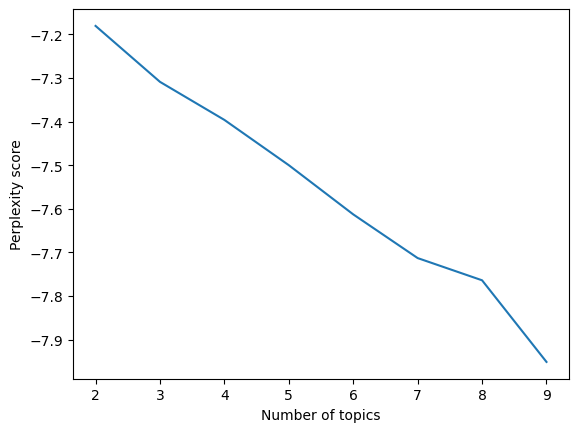

In [43]:
x= range(2,10)
plt.plot(x, perplex_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

> 2.2.1 Cohearence 그래프 만들기

In [36]:
cohearence_values=[]
for i in range(2,10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    cohearence_model=CoherenceModel(model=ldamodel, texts=all_documents, dictionary=dictionary, topn=i)
    cohearence_score=cohearence_model.get_coherence()
    cohearence_values.append(cohearence_score)

In [37]:
cohearence_values

[0.8329728618333644,
 0.6648870050714963,
 0.7789739582978883,
 0.4695293872255643,
 0.5236594368832193,
 0.4844323047651585,
 0.40990664854040826,
 0.4167239874740294]

Text(0, 0.5, 'Cohearence score')

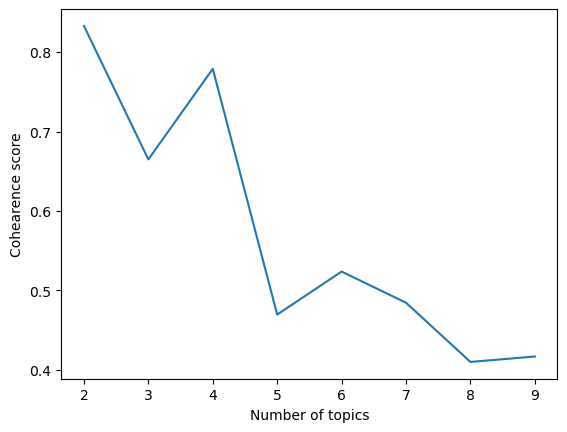

In [44]:
x=range(2,10)
plt.plot(x, cohearence_values)
plt.xlabel('Number of topics')
plt.ylabel('Cohearence score')

### 2.3 선정한 토픽 개수로 Action 넘버 매칭

In [45]:
topic_n=5
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=1, passes=5) # passes 모델 학습 횟수


In [53]:
action_align=[]

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label=[]
    value=[]

    for score in doc:
        label.append(score[0])
        value.append(score[1]) # label 값, value값 분리

    max_index=np.argmax(value)
    action_n=label[max_index]
    action_align.append(action_n)

100%|████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 1389.28it/s]


In [51]:
ldamodel.get_document_topics(corpus)[15] # ↑ label 값, value값 분리 후 value max를 찾아서 인덱스 할당

[(3, 0.78736097), (5, 0.19767451)]

In [54]:
df_cluster0['action_cluster']=action_align

In [55]:
df_cluster0

,Date,Name,Score,Review,like,tagged_review,vector,cluster,action_cluster
18,2019년 12월 17일,jeonghoon yi,3,공기청정기는 컨트롤 기능이 있는데 다른 제품들은 상태만 보이고 컨트롤이 안 되네요 ...,4,"[공기청정기, 컨트롤, 기능, 제품, 상태, 보이, 컨트롤, 안, 기능, 추가, 해...","[-0.06263769, 0.04992298, 0.02898739, -0.07223...",0,3
106,2019년 11월 26일,이상원,1,스타일러 바지 패딩 모두 어플에 깔수 있어야지 선택1개만 할수 있어 짜증.할때마다 ...,1,"[스타, 이르다, 바지, 패딩, 어플, 깔다, 선택, 개, 짜증, 깔다, 번거러움,...","[-0.067730755, 0.059795424, 0.02774684, -0.052...",0,5
183,2019년 9월 28일,장상윤,1,공기청정기 2대모두 컨트롤이안되서 등록해제하고 다시등록하려했는데 와이파이 버튼 눌러...,5,"[공기청정기, 대모, 컨트롤, 안되다, 등록, 해제, 다시, 등록, 와이파이, 버튼...","[-0.11289807, 0.1141409, 0.07273247, -0.108509...",0,0
185,2019년 10월 29일,손레미,1,이전글 이번 업데이트 이후 구형 스마트폰인 베가아이언 에서 어풀실행 불가 현상어풀 ...,6,"[이전, 글, 업데이트, 이후, 구형, 스마트폰, 베가, 아이언, 어풀, 실행, 불...","[-0.047438595, 0.055643898, 0.034015585, -0.05...",0,7
197,2019년 10월 31일,JK P,3,코노 매장에서 에어컨 17대 연결해서 쓰고 있습니다. 어플 반응속도도 빨라지고 다 ...,5,"[코노, 매장, 에어컨, 대다, 연결하다, 쓰다, 어플, 반응속도, 빨르다, 좋다,...","[-0.1154355, 0.089834765, 0.037123524, -0.1082...",0,3
...,...,...,...,...,...,...,...,...,...
6051,2016년 10월 16일,Google 사용자,1,이거 완전 사기네 사기야 !!!!! 초간단 이라더니!!!!! 씨밸 일요일 아침부터...,3,"[거, 완전, 사기, 사기, 초, 간단, 이르다, 씨밸, 일요일, 아침, 하루, 종...","[-0.073497176, 0.06366117, 0.026017675, -0.052...",0,4
6098,2016년 6월 5일,J원,1,공기청전기 오전에 꺼져서 오후에 켤려고 설정해도 오전오후 설정하면 자꾸 오후오후으로...,2,"[공기, 청, 전기, 오전, 꺼지다, 오후, 켜다, 설정, 오전, 오후, 설정, 자...","[-0.054861337, 0.05622917, 0.019325703, -0.055...",0,1
6126,2016년 12월 22일,김민정,1,기존 엘지 스마트조명 사용자입니다. 스마트조명을 쓰려면 어플과 연동이 돼야되는데 왜...,0,"[기존, 엘지, 스마트, 조명, 사용자, 스마트, 조명, 쓰다, 어플, 연동, 돼다...","[-0.07660888, 0.084449776, 0.03936892, -0.0820...",0,7
6144,2018년 7월 29일,아라하늘,4,궁금해서 리뷰남깁니다 에너지 모니터링 기능이 있던데 확실한 정보인가요? 물론 아래에...,0,"[궁금하다, 리뷰, 남기다, 에너지, 모니터링, 기능, 확실하다, 정보, 아래, 실...","[-0.07402633, 0.07408678, 0.027241249, -0.0716...",0,4


# ◆ 3. LDA 시각화 (LDAvis)


In [40]:
!pip install pyLDAvis

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.6/2.6 MB 12.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.6 MB 11.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.6 MB 7.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.5/2.6 MB 8.2 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.6 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.

In [41]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [56]:
prepared_data=gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(prepared_data)

In [57]:
topics=ldamodel.show_topics(num_topics=-1, formatted=True)
topics

[(0,
  '0.023*"등록" + 0.011*"보다" + 0.010*"연결" + 0.010*"안되다" + 0.009*"없다" + 0.009*"기능" + 0.009*"사용" + 0.009*"스마트" + 0.008*"접속" + 0.007*"재"'),
 (1,
  '0.021*"온도" + 0.014*"앱" + 0.014*"켜다" + 0.012*"않다" + 0.008*"연결" + 0.008*"오후" + 0.008*"어플" + 0.008*"보다" + 0.008*"동네" + 0.006*"등록"'),
 (2,
  '0.015*"등록" + 0.012*"수" + 0.011*"안되다" + 0.011*"연결" + 0.011*"해보다" + 0.011*"와이파이" + 0.010*"설정" + 0.010*"에어컨" + 0.010*"제품" + 0.010*"없다"'),
 (3,
  '0.018*"예약" + 0.013*"제품" + 0.013*"추가" + 0.012*"어플" + 0.012*"입력" + 0.012*"사용" + 0.012*"고객" + 0.010*"켜지다" + 0.010*"꺼지다" + 0.010*"유통"'),
 (4,
  '0.015*"세탁기" + 0.015*"코스" + 0.010*"안되다" + 0.009*"작동" + 0.009*"건조기" + 0.008*"앱" + 0.008*"좋다" + 0.007*"보다" + 0.007*"만들다" + 0.007*"오프"'),
 (5,
  '0.018*"연결" + 0.017*"제품" + 0.017*"앱" + 0.012*"업데이트" + 0.012*"안되다" + 0.011*"등록" + 0.009*"안드" + 0.009*"버그" + 0.008*"연결하다" + 0.008*"접속"'),
 (6,
  '0.016*"앱" + 0.013*"문제" + 0.011*"오다" + 0.009*"사용" + 0.009*"엘지" + 0.008*"전력량" + 0.008*"연결" + 0.008*"제품" + 0.008*"정보" + 0.007*"개선"'),
 (7,
  '0.019*

In [67]:
new_action_topic=[]
for i in df_cluster0.action_cluster:
    if i==4: # 처음에 설정한 액션토픽값
        n=1 # vis에서 나온 토픽
    elif i==0:
        n=4
    elif i==8:
        n=9
    elif i==6:
        n=8
    elif i==1:
        n=7
    elif i==5:
        n=6
    elif i==6:
        n=5
    else :
        n=i
    
    new_action_topic.append(n)

In [68]:
df_cluster0.action_cluster=new_action_topic

In [69]:
df_cluster0

,Date,Name,Score,Review,like,tagged_review,vector,cluster,action_cluster
18,2019년 12월 17일,jeonghoon yi,3,공기청정기는 컨트롤 기능이 있는데 다른 제품들은 상태만 보이고 컨트롤이 안 되네요 ...,4,"[공기청정기, 컨트롤, 기능, 제품, 상태, 보이, 컨트롤, 안, 기능, 추가, 해...","[-0.06263769, 0.04992298, 0.02898739, -0.07223...",0,3
106,2019년 11월 26일,이상원,1,스타일러 바지 패딩 모두 어플에 깔수 있어야지 선택1개만 할수 있어 짜증.할때마다 ...,1,"[스타, 이르다, 바지, 패딩, 어플, 깔다, 선택, 개, 짜증, 깔다, 번거러움,...","[-0.067730755, 0.059795424, 0.02774684, -0.052...",0,6
183,2019년 9월 28일,장상윤,1,공기청정기 2대모두 컨트롤이안되서 등록해제하고 다시등록하려했는데 와이파이 버튼 눌러...,5,"[공기청정기, 대모, 컨트롤, 안되다, 등록, 해제, 다시, 등록, 와이파이, 버튼...","[-0.11289807, 0.1141409, 0.07273247, -0.108509...",0,4
185,2019년 10월 29일,손레미,1,이전글 이번 업데이트 이후 구형 스마트폰인 베가아이언 에서 어풀실행 불가 현상어풀 ...,6,"[이전, 글, 업데이트, 이후, 구형, 스마트폰, 베가, 아이언, 어풀, 실행, 불...","[-0.047438595, 0.055643898, 0.034015585, -0.05...",0,7
197,2019년 10월 31일,JK P,3,코노 매장에서 에어컨 17대 연결해서 쓰고 있습니다. 어플 반응속도도 빨라지고 다 ...,5,"[코노, 매장, 에어컨, 대다, 연결하다, 쓰다, 어플, 반응속도, 빨르다, 좋다,...","[-0.1154355, 0.089834765, 0.037123524, -0.1082...",0,3
...,...,...,...,...,...,...,...,...,...
6051,2016년 10월 16일,Google 사용자,1,이거 완전 사기네 사기야 !!!!! 초간단 이라더니!!!!! 씨밸 일요일 아침부터...,3,"[거, 완전, 사기, 사기, 초, 간단, 이르다, 씨밸, 일요일, 아침, 하루, 종...","[-0.073497176, 0.06366117, 0.026017675, -0.052...",0,1
6098,2016년 6월 5일,J원,1,공기청전기 오전에 꺼져서 오후에 켤려고 설정해도 오전오후 설정하면 자꾸 오후오후으로...,2,"[공기, 청, 전기, 오전, 꺼지다, 오후, 켜다, 설정, 오전, 오후, 설정, 자...","[-0.054861337, 0.05622917, 0.019325703, -0.055...",0,7
6126,2016년 12월 22일,김민정,1,기존 엘지 스마트조명 사용자입니다. 스마트조명을 쓰려면 어플과 연동이 돼야되는데 왜...,0,"[기존, 엘지, 스마트, 조명, 사용자, 스마트, 조명, 쓰다, 어플, 연동, 돼다...","[-0.07660888, 0.084449776, 0.03936892, -0.0820...",0,7
6144,2018년 7월 29일,아라하늘,4,궁금해서 리뷰남깁니다 에너지 모니터링 기능이 있던데 확실한 정보인가요? 물론 아래에...,0,"[궁금하다, 리뷰, 남기다, 에너지, 모니터링, 기능, 확실하다, 정보, 아래, 실...","[-0.07402633, 0.07408678, 0.027241249, -0.0716...",0,1


In [70]:
prepared_data=gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'ldavis_actor0.html')
pyLDAvis.display(prepared_data)

# ◆ 4. LDA 분석을 위한 후작업
* LDAvis와 LDA모델의 토픽 넘버 매칭
* LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭해야한다.